<a href="https://colab.research.google.com/github/saikumar28102000/THE-SPARK-FOUNDATION/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Data Science and Business Analytics Intern @ The Sparks Foundation

#GRIP MARCH 2021


### Author: SAI KUMAR T S

### Task 5: Exploratory Data Analysis- Sports

Problem Statement 1: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.

Problem Statement 2: As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

Problem Statement 3: Suggest teams or players a company should endorse for its products.¶

##### Data Import and Pre-processing

In [ ]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

##### Import the dataset "matches.csv"

In [ ]:
# loading the data
matches=pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
#To show total rows and columns
matches.shape

(756, 18)

In [ ]:
#dropping not necessary columns
matches.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [ ]:
#Data Type
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
dtype: object

In [ ]:
# To check any Null Values
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [ ]:
# To check any duplicate rows
matches.duplicated().sum()

0

In [ ]:
# Statistical Details 
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
#no.of distinct values
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
dtype: int64

In [ ]:
matches.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

##### Import the dataset "deliveries.csv"

In [ ]:
# loading the data
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
#To show total rows and columns
deliveries.shape

(179078, 21)

In [ ]:
# Data Types
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [ ]:
# To check any Null Values
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
# To check any duplicate rows
deliveries.duplicated().sum()

23

In [ ]:
#dropping those duplicate rows
deliveries.drop_duplicates(inplace=True)

In [ ]:
#check again to make sure duplicated rows has been dropped
deliveries.duplicated().sum()


0

In [ ]:
# Statistical Details 
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
#no.of distinct values
deliveries.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

### Join the two datasets together

In [ ]:
df = pd.merge(matches,deliveries, left_on='id', right_on ='match_id')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
#To show total rows and columns
df.shape

(179055, 36)

### Data Visualization

##### correlation matrix 

In [ ]:
df.drop(['id','match_id'],axis=1).corr()


,season,dl_applied,win_by_runs,win_by_wickets,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
season,1.000000,0.001415,-0.040273,-0.006509,0.000976,0.007613,-0.003230,-0.001636,-0.010530,-0.004096,-0.013175,-0.011434,-0.002428,0.036552,-0.019081,0.032546
dl_applied,0.001415,1.000000,-0.007722,-0.019157,-0.032568,-0.045707,0.001732,-0.002873,0.003718,-0.000664,-0.000388,-0.001445,-0.000451,0.006411,0.001960,0.006841
win_by_runs,-0.040273,-0.007722,1.000000,-0.561518,-0.000482,0.004167,0.001222,-0.012259,-0.000096,0.002361,0.003097,0.003535,-0.001926,0.003041,0.003129,0.003714
win_by_wickets,-0.006509,-0.019157,-0.561518,1.000000,-0.024405,-0.038388,-0.001996,-0.020730,0.005834,-0.004959,-0.005176,-0.001299,0.004232,-0.008268,-0.000414,-0.008371
inning,0.000976,-0.032568,-0.000482,-0.024405,1.000000,-0.050118,-0.003933,0.084158,0.001196,-0.000759,-0.001972,-0.000906,0.003442,-0.005378,-0.000522,-0.005499
over,0.007613,-0.045707,0.004167,-0.038388,-0.050118,1.000000,-0.007428,-0.034333,-0.010015,0.012109,-0.004817,0.016981,-0.000979,0.086688,-0.002520,0.086304
ball,-0.003230,0.001732,0.001222,-0.001996,-0.003933,-0.007428,1.000000,-0.001142,-0.004662,0.006603,-0.002794,0.000568,0.000711,0.007949,-0.002611,0.007406
is_super_over,-0.001636,-0.002873,-0.012259,-0.020730,0.084158,-0.034333,-0.001142,1.000000,-0.001019,0.001353,0.001736,0.013640,-0.000071,0.010125,0.003504,0.010890
wide_runs,-0.010530,0.003718,-0.000096,0.005834,0.001196,-0.010015,-0.004662,-0.001019,1.000000,-0.006197,-0.015854,-0.008676,0.012817,-0.094586,0.720932,0.059075
bye_runs,-0.004096,-0.000664,0.002361,-0.004959,-0.000759,0.012109,0.006603,0.001353,-0.006197,1.000000,-0.004595,-0.002515,-0.000142,-0.018938,0.332359,0.051946


##### No.of matches played in each season

In [ ]:
matches.season.value_counts(normalize=True)

2013    0.100529
2012    0.097884
2011    0.096561
2010    0.079365
2014    0.079365
2016    0.079365
2018    0.079365
2019    0.079365
2015    0.078042
2017    0.078042
2008    0.076720
2009    0.075397
Name: season, dtype: float64

Text(0.5, 1.0, '\n No.of matches played in each season')

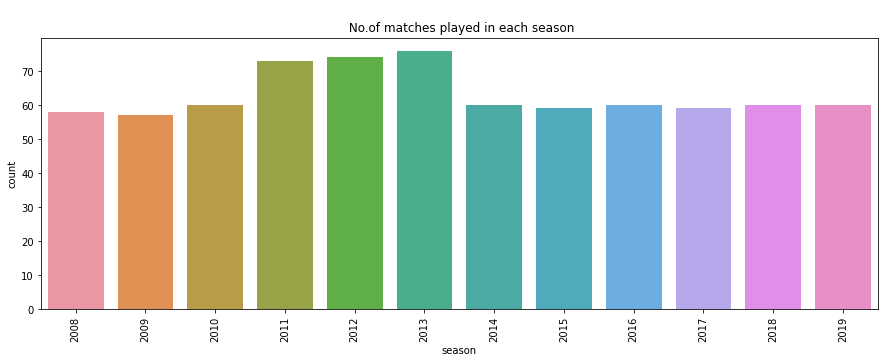

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=matches['season'],data=matches)
plt.xticks(rotation=90)
plt.title("\n No.of matches played in each season")


- Season held in 2011,2012,2013 have more matches than other seasons

##### No.of matches played in each city

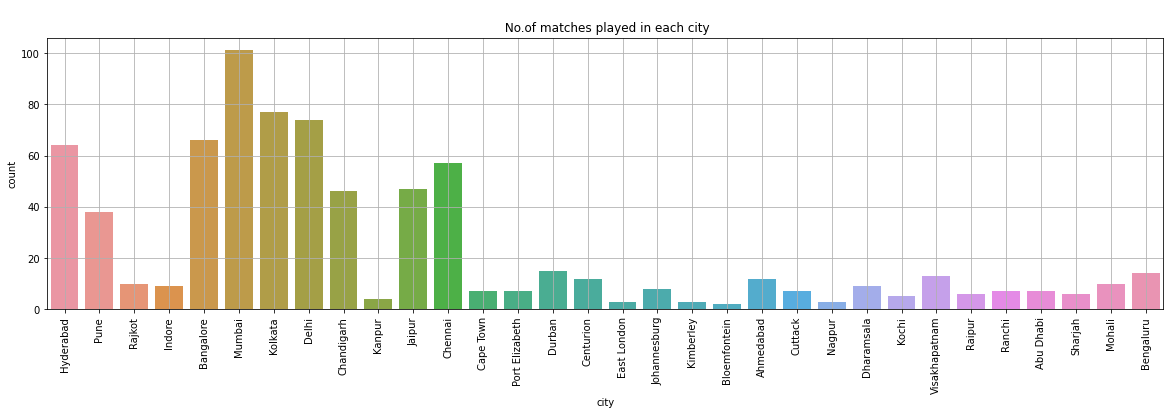

In [ ]:
plt.figure(figsize=(20,5)) 
sns.countplot(x=matches['city'],data=matches)
plt.xticks(rotation=90)
plt.title("\n No.of matches played in each city")
plt.grid()

- Most of the matches were held in Mumbai followed by Kolkata,delhi and Banglore respectively

##### No.of teams played in each season

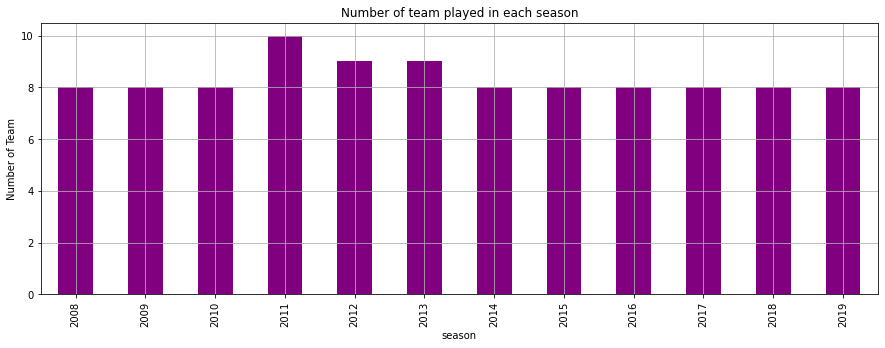

In [ ]:
plt.figure(figsize=(15,5)) 
matches.groupby('season')['team1'].nunique().plot.bar(color='purple')
plt.ylabel("Number of Team")
plt.title("Number of team played in each season")
plt.grid()

- 10 teams played in season 2011
- 9 teams played in season 2012 and 2013
- 8 teams played in all other seasons


##### Team with more Toss_win

Text(0.5, 1.0, '\n Team & Toss_win')

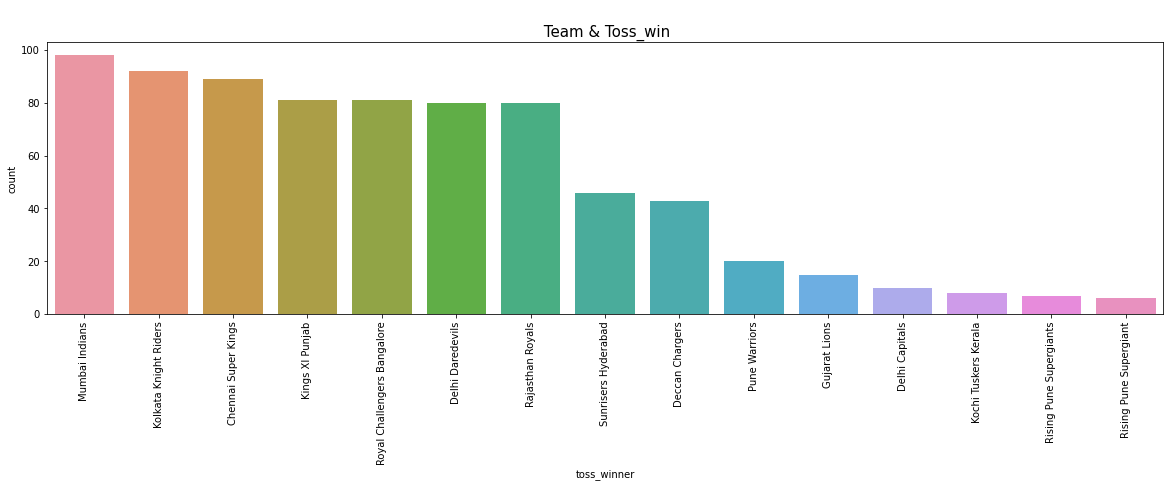

In [ ]:
plt.figure(figsize=(20,5)) 
sns.countplot(x=matches['toss_winner'],data=matches,order=matches['toss_winner'].value_counts().index)
plt.xticks(rotation=90)
plt.title("\n Team & Toss_win",fontsize=15)


- from season(2008-19), Mumbai Indians has the highest toss_winning count

##### Highest toss_winning team in each season

In [ ]:
toss_winning_teams = matches[['season','toss_winner']]
toss_winner_team = {}
for i in sorted(toss_winning_teams.season.unique()):
    toss_winner_team[i]=toss_winning_teams[toss_winning_teams['season']==i]['toss_winner'].value_counts().index[0]
    
toss_winner_team  
    

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Kings XI Punjab',
 2012: 'Mumbai Indians',
 2013: 'Kolkata Knight Riders',
 2014: 'Chennai Super Kings',
 2015: 'Chennai Super Kings',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Chennai Super Kings'}

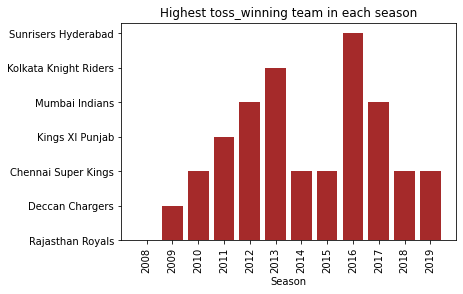

In [ ]:
D = toss_winner_team 
plt.bar(range(len(D)),list(D.values()),color='brown')
plt.xticks(range(len(D)),list(D.keys()),rotation=90)
plt.title("Highest toss_winning team in each season")
plt.xlabel("Season")
plt.show()


##### Toss Decision

<AxesSubplot:ylabel='toss_decision'>

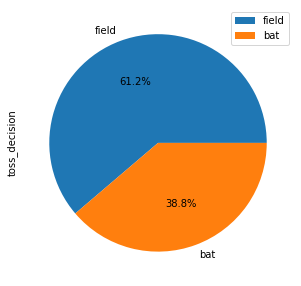

In [ ]:
matches.toss_decision.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5),legend=True)


- Most of the time, team chooses to field after winning toss

##### Individual team toss decision after winning toss

Text(0.5, 1.0, '\n Individual team toss decision after winning toss')

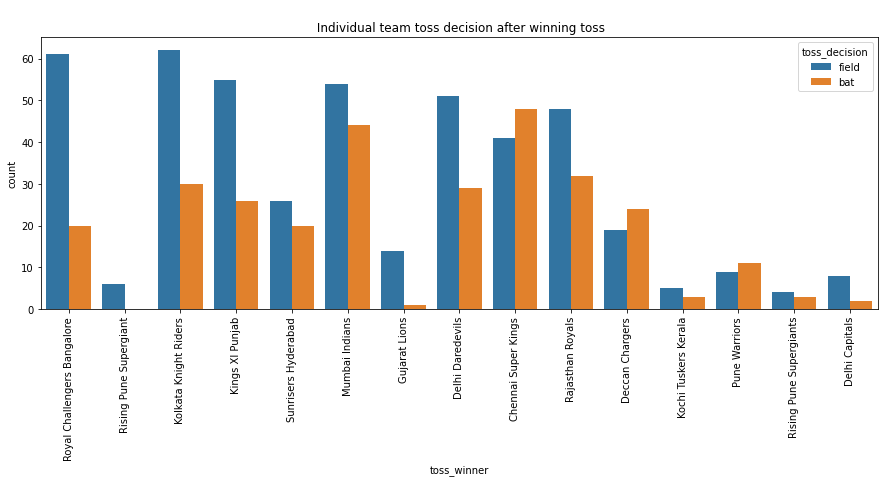

In [ ]:
plt.figure(figsize=(15,5)) 
sns.countplot(x=matches['toss_winner'],hue=matches.toss_decision,data=matches) 
plt.xticks(rotation=90)
plt.title("\n Individual team toss decision after winning toss")


- Most teams choosed to field first after winning toss except ChennaiSuperKing,who had mostly choosed to bat first

##### Winner

Text(0.5, 1.0, '\nWinning count of each team ')

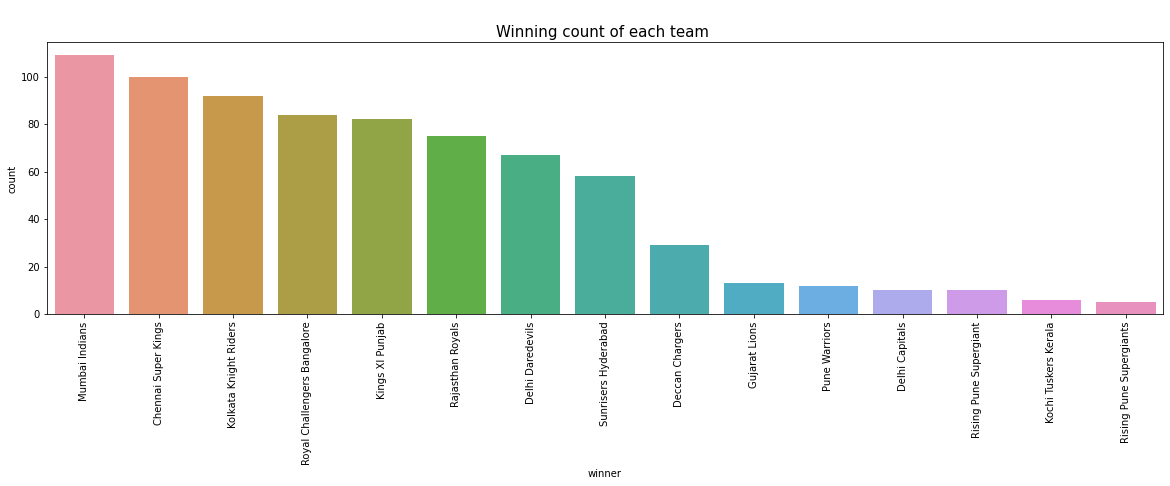

In [ ]:
plt.figure(figsize=(20,5)) 
sns.countplot(x=matches['winner'],data=matches,order=matches['winner'].value_counts().index)
plt.xticks(rotation=90)
plt.title("\nWinning count of each team ",fontsize=15)

- Mumbai Indians has won most of the matches followed by ChennaiSuperKings and KolkataKnightRiders

#####  Winning team in each Season

In [ ]:
winning_teams = matches[['season','winner']]
winner_team = {}
for i in sorted(winning_teams.season.unique()):
    winner_team[i]=winning_teams[winning_teams['season']==i]['winner'].value_counts().index[0]
    
winner_team  
    

{2008: 'Rajasthan Royals',
 2009: 'Delhi Daredevils',
 2010: 'Mumbai Indians',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kings XI Punjab',
 2015: 'Chennai Super Kings',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians'}

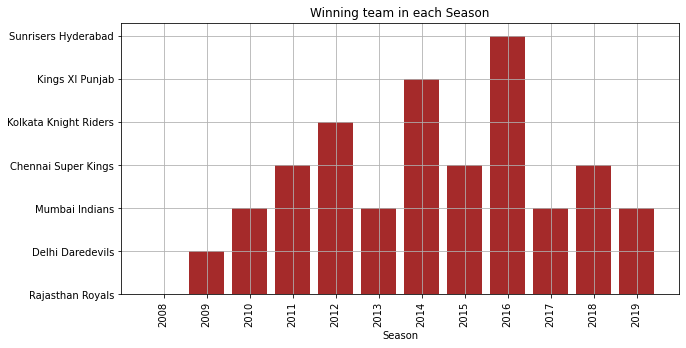

In [ ]:
E = winner_team 
plt.figure(figsize=(10,5))
plt.bar(range(len(E)),list(E.values()),color='brown')
plt.xticks(range(len(E)),list(E.keys()),rotation=90)
plt.title("Winning team in each Season")
plt.xlabel("Season")
plt.grid()
plt.show()




Season wise Winner : 

- 2008 : Rajasthan Royals
- 2009 : Delhi Daredevils
- (2010,2013,2015,2017,2019) : Mumbai Indians
- (2011,2018 ): Chennai Super Kings
- 2012 : Kolkata Knight Riders
- 2014 : Kings XI Punjab
- 2016 : Sunrisers Hyderabad


##### Toss_decision vs Winner

Text(0.5, 1.0, '\nToss_decision vs Winner ')

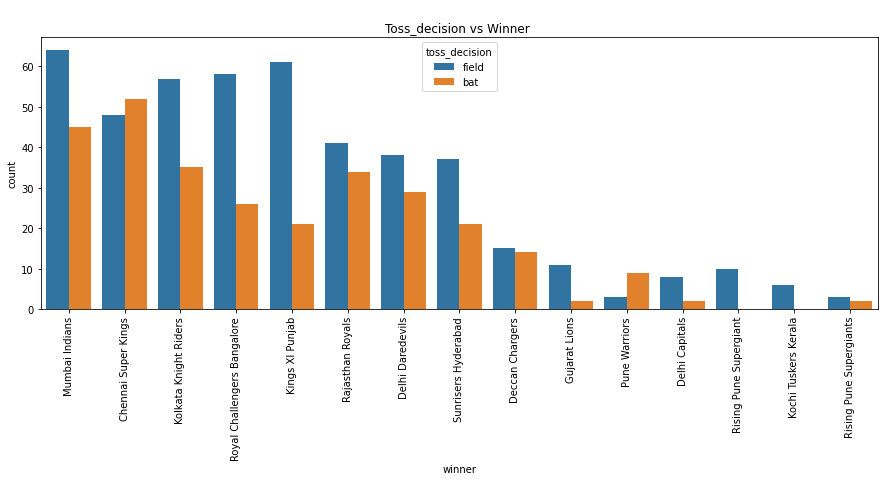

In [ ]:
plt.figure(figsize=(15,5)) 
sns.countplot(x=matches['winner'],hue=matches.toss_decision,data=matches,order=matches['winner'].value_counts().index) 
plt.xticks(rotation=90)
plt.title("\nToss_decision vs Winner ")


##### Toss_decision affecting winning

Text(0.5, 1.0, '\nToss_decision affects match result ')

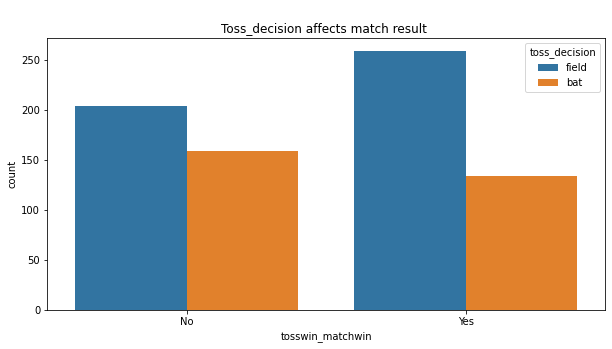

In [ ]:
matches['tosswin_matchwin'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize=(10,5)) 
sns.countplot(x=matches['tosswin_matchwin'],hue=matches.toss_decision,data=matches) 
plt.title("\nToss_decision affects match result ")



- Teams winning toss and opting to field first had won most of the time

##### Top Players with most player_of_match awards

Text(0.5, 1.0, 'Top Players with most player_of_match awards')

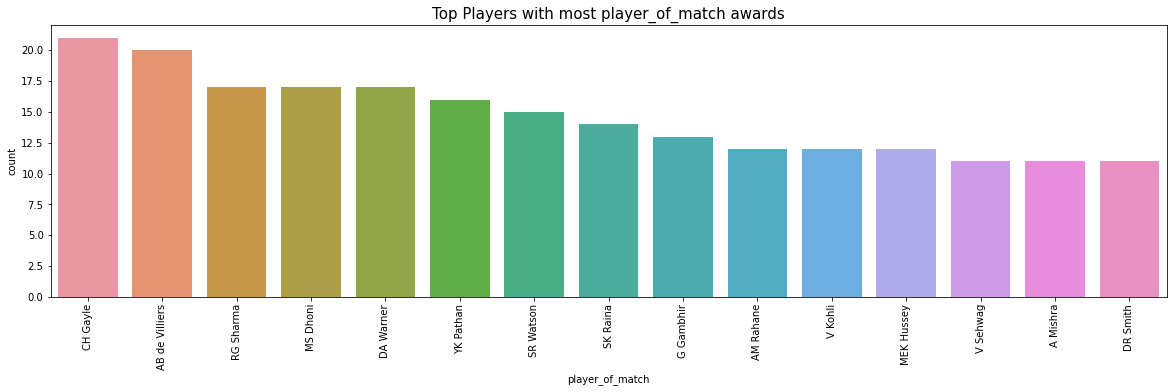

In [ ]:
plt.figure(figsize=(20,5)) 
sns.countplot(x=matches['player_of_match'],data=matches,order=matches['player_of_match'].value_counts().head(15).index)
plt.xticks(rotation=90)
plt.title("Top Players with most player_of_match awards",fontsize=15)

CH Gayle had won maximum player_of_match awards

##### Season wise Top player with most man_of_match awards

In [ ]:
season_top_player = {}
for i in sorted(matches.season.unique()):
    season_top_player[i]= matches[matches.season==i]['player_of_match'].value_counts().index[0]

season_top_player

{2008: 'SE Marsh',
 2009: 'YK Pathan',
 2010: 'SR Tendulkar',
 2011: 'CH Gayle',
 2012: 'CH Gayle',
 2013: 'MEK Hussey',
 2014: 'GJ Maxwell',
 2015: 'DA Warner',
 2016: 'V Kohli',
 2017: 'NM Coulter-Nile',
 2018: 'Rashid Khan',
 2019: 'AD Russell'}

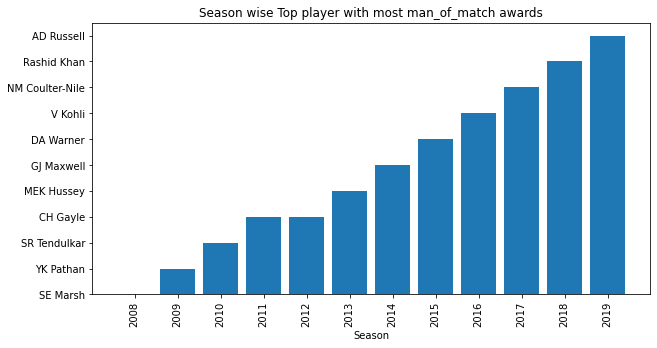

In [ ]:
F = season_top_player
plt.figure(figsize=(10,5))
plt.bar(range(len(F)),list(F.values()))
plt.xticks(range(len(F)),list(F.keys()),rotation=90)
plt.title("Season wise Top player with most man_of_match awards")
plt.xlabel("Season")
plt.show()

##### Win_by_runs

In [ ]:
matches.win_by_runs.max()

146

In [ ]:
#row information
matches.iloc[matches.win_by_runs.idxmax()]

id                                44
season                          2017
city                           Delhi
date                      2017-05-06
team1                 Mumbai Indians
team2               Delhi Daredevils
toss_winner         Delhi Daredevils
toss_decision                  field
result                        normal
dl_applied                         0
winner                Mumbai Indians
win_by_runs                      146
win_by_wickets                     0
player_of_match          LMP Simmons
venue               Feroz Shah Kotla
tosswin_matchwin                  No
Name: 43, dtype: object

##### Win_by_wickets

In [ ]:
matches.win_by_wickets.max()

10

In [ ]:
matches.iloc[matches.win_by_wickets.idxmax()]

id                                                       3
season                                                2017
city                                                Rajkot
date                                            2017-04-07
team1                                        Gujarat Lions
team2                                Kolkata Knight Riders
toss_winner                          Kolkata Knight Riders
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                               Kolkata Knight Riders
win_by_runs                                              0
win_by_wickets                                          10
player_of_match                                    CA Lynn
venue               Saurashtra Cricket Association Stadium
tosswin_matchwin                                       Yes
Name: 2, dtype: object



##### Merged dataset

##### Top 10 batsman in IPL

Text(0.5, 1.0, 'Top 10 batsman in IPL')

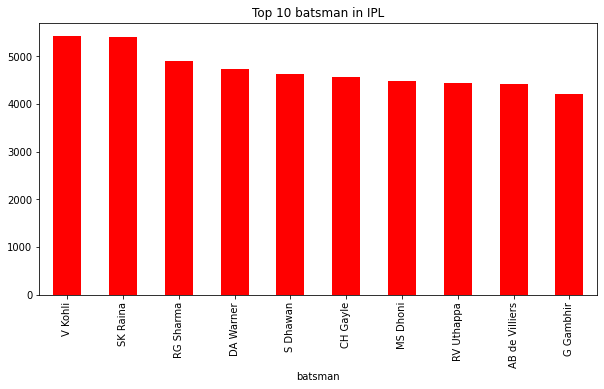

In [ ]:
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(color='red',figsize=(10,5))
plt.title("Top 10 batsman in IPL")

##### Season wise top batsman

In [ ]:
season_top_batsman = {}
for i in sorted(df.season.unique()):
    season_top_batsman[i]= df[df.season==i].groupby('batsman')['batsman_runs'].sum().index[0]

season_top_batsman

{2008: 'A Chopra',
 2009: 'A Chopra',
 2010: 'A Kumble',
 2011: 'A Mishra',
 2012: 'A Ashish Reddy',
 2013: 'A Ashish Reddy',
 2014: 'A Mishra',
 2015: 'A Ashish Reddy',
 2016: 'A Ashish Reddy',
 2017: 'A Choudhary',
 2018: 'A Dananjaya',
 2019: 'A Joseph'}

##### Top 10 bowlers in IPL

Text(0.5, 1.0, 'Top 10 bowlers in IPL')

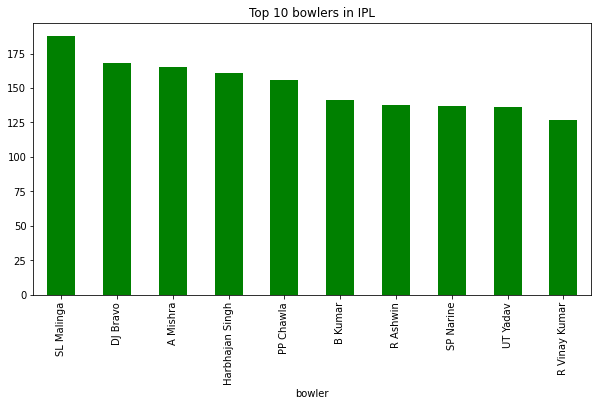

In [ ]:
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot.bar(color='green',figsize=(10,5))
plt.title("Top 10 bowlers in IPL")

- Malinga has taken most no.of wickets

##### Dismissal_kind

Text(0.5, 1.0, '\n Types of dismissal')

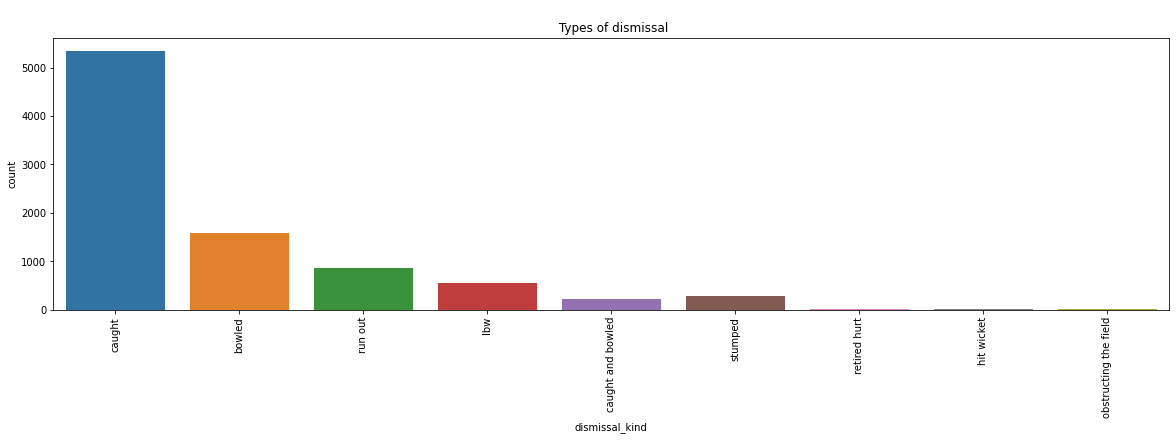

In [ ]:
plt.figure(figsize=(20,5)) 
sns.countplot(x=df['dismissal_kind'],data=df)
plt.xticks(rotation=90)
plt.title("\n Types of dismissal")


- Caught is the most dismissal_kind

##### Highest Total_runs in each season

<AxesSubplot:xlabel='season'>

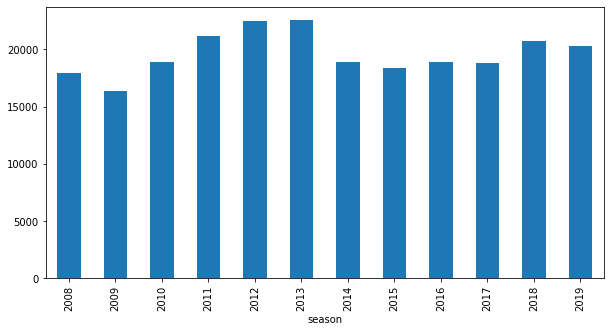

In [ ]:
df.groupby('season')['total_runs'].sum().plot.bar(figsize=(10,5))

- season 2013 had scored highest total runs

### Insights : 

- Mumbai Indians is the most successful team, having won the maximum number of tosses as well as matches.

- If the team who wins the toss, chooses to field first, then that team has the highest chance of winning the match.

- Chris Gayle has won the title 'Player of Match' maximum number of times. 

- The top batsman in IPL are V Kohli,SK Raina, RG Sharma, DA Warner, S Dhawan, MS Dhoni,CH Gayle 

- The top wicket taking bowlers are  SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla, B Kumar, R Ashwin